# Workspace \#4: ``ska.py``

In [1]:
# %load firstcell.py
# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# getting future division
from __future__ import division

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
# %matplotlib inline
%matplotlib notebook

%config InlineBackend.figure_format = "retina"
#rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

# current directory
current_dir = os.getcwd()

In [2]:
from random import random

import sys
sys.path.insert(0, '../')

import tools as tl
import constants as ct
import particle as pt
import ska as sk

/home/chen/Code/axion_laser/github/workspace_notebooks/../ska.py:29: RuntimeWarning: divide by zero encountered in true_divide
  B_eff = 2.*r / np.sqrt(number_of_tel)


In [3]:
# The contents of astro.py
dir(sk)

['SKA_conf',
 'SKA_exper_nu',
 'SKA_get_active_baseline',
 'SKA_specs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'ct',
 'division',
 'exp',
 'get_baseline',
 'log',
 'log10',
 'np',
 'os',
 'path',
 'pi',
 'power',
 'pt',
 'sqrt']

In [4]:
help(sk.SKA_exper_nu)

Help on function SKA_exper_nu in module ska:

SKA_exper_nu(nu)
    Returns the SKA experiment mode (low/mid) sensitive to the given frequency nu [GHz].
    
    Parameters
    ----------
    nu : frequency [GHz]



In [5]:
print(sk.SKA_exper_nu(ct._nu_min_ska_low_*0.9))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_low_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_low_*0.9)))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_mid_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_mid_*0.9)))
print(sk.SKA_exper_nu(ct._nu_max_ska_mid_*1.1))

None
SKA low SKA low
SKA mid SKA mid
None


In [6]:
help(sk.SKA_specs)

Help on function SKA_specs in module ska:

SKA_specs(nu, exper_mode, eta=0.8, correlation_mode=None, theta_sig=None)
    Returns the specifications (area [m^2], window, receiver noise brightness temperature [K], and solid angle resolution [sr], number_of_dishes, number_of_measurements) of the SKA experiment mode, for the given frequency [GHz].
    
    Parameters
    ----------
    nu : frequency [GHz]
    exper_mode : mode in which the experiment is working
    eta: the detector efficiency (default: 0.8)
    correlation_mode: whether to run in interferometry mode or single dish mode. Default None is meant to raise error if not assigned explicitly.
    theta_sig: the signal size we want to observe [radian]



In [7]:
print(sk.SKA_specs(ct._nu_min_ska_low_*1.1, 'SKA low', correlation_mode="single dish")) # within SKA low detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA mid', correlation_mode="single dish")) # within SKA mid detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA low', correlation_mode="single dish")) # outside SKA low detection region

(580372.0, 1.0, 40.0, 0.02100423912268281, 511.74001458243487, 511.74001458243487)
(32647, 1.0, 20.0, 0.002752364557717247, 184.7442285198616, 184.7442285198616)
(580372.0, 0.0, 40.0, 0.0004288921037460408, 511.74001458243487, 511.74001458243487)


In [8]:
Nma = 101
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

In [9]:
sk.SKA_specs(nulow, 'SKA low', correlation_mode="single dish")[3]

array([0.02541215, 0.02347308, 0.02168188, 0.02002729, 0.01849891,
       0.01708711, 0.01578301, 0.0145784 , 0.0134657 , 0.0124379 ,
       0.01148852, 0.01061159, 0.00980158, 0.00905338, 0.00836228,
       0.00772393, 0.0071343 , 0.00658967, 0.00608662, 0.00562196,
       0.00519276, 0.00479633, 0.00443016, 0.00409195, 0.00377955,
       0.003491  , 0.00322447, 0.00297829, 0.00275091, 0.00254089,
       0.00234689, 0.00216771, 0.00200221, 0.00184934, 0.00170815,
       0.00157773, 0.00145727, 0.00134601, 0.00124324, 0.00114832,
       0.00106065, 0.00097966, 0.00090487, 0.00083578, 0.00077197,
       0.00071303, 0.00065859, 0.0006083 , 0.00056186, 0.00051896])

In [10]:
sk.SKA_specs(numid, 'SKA mid', correlation_mode="single dish")[3]

array([3.33031005e-03, 2.86254255e-03, 2.46047228e-03, 2.11487328e-03,
       1.81781493e-03, 1.56248012e-03, 1.34300900e-03, 1.15436457e-03,
       9.92217197e-04, 8.52845276e-04, 7.33049871e-04, 6.30081315e-04,
       5.41576128e-04, 4.65502784e-04, 4.00115088e-04, 3.43912110e-04,
       2.95603736e-04, 2.54081058e-04, 2.18390928e-04, 1.87714076e-04,
       1.61346310e-04, 1.38682350e-04, 1.19201936e-04, 1.02457887e-04,
       8.80658341e-05, 7.56954000e-05, 6.50626134e-05, 5.59233916e-05,
       4.80679372e-05, 4.13159227e-05, 3.55123503e-05, 3.05239945e-05,
       2.62363435e-05, 2.25509709e-05, 1.93832757e-05, 1.66605409e-05,
       1.43202638e-05, 1.23087212e-05, 1.05797364e-05, 9.09361905e-06,
       7.81625401e-06, 6.71831821e-06, 5.77460754e-06, 4.96345828e-06,
       4.26624976e-06, 3.66697692e-06, 3.15188291e-06, 2.70914328e-06,
       2.32859452e-06, 2.00150080e-06, 1.72035338e-06])

In [27]:
print(ct._SKA1Mid_number_of_dishes_)
print(ct._SKALow_number_of_stations_)

197.0
512.0


## 7. SKA modes

#### Effective area

In [11]:
# Ghosh SKA1-mid number of dishes: 
1e6/(3.14159*7.5**2)

5658.847200868916

In [12]:
# SKA1-mid effective area
64 * 3.14 * (13.5/2)**2 + 133 * 3.14 * (15/2)**2

32647.364999999998

In [13]:
# SKA1-mid effective area (2013 design)
64 * 3.14 * (13.5/2)**2 + 190 * 3.14 * (15/2)**2

42714.99

In [14]:
# SKA-low effective area (latest summary v4)
512 * 3.14 * 38**2 / 4

580372.48

In [15]:
# SKA-low effective area (2015 design, 35m-stations)
512 * 3.14 * 35**2 / 4

492352.0

In [16]:
# SKA-low effective area (2013 design, 35m-stations x 911 stations)
911 * 3.14 * 35**2 / 4

876040.375

#### angular size

In [17]:
# SKA-low
print('Caputo et al:', 3.6 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 1000.)

print('Caputo et al:', 25.2 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 150.)


Caputo et al: 0.0010466666666666669
Simple estimate:  0.001
Caputo et al: 0.007326666666666666
Simple estimate:  0.006666666666666667


In [18]:
# the baseline needed to resolve W28
6./(48./60/180 * 3.14)

429.9363057324841

Use the array configuration

In [122]:
# (x, y, bins, hist, dist_r_arr,
# dist_frac_arr, baseline_arr) = sk.SKA_conf['debug low']
(x, y, bins, hist) = sk.SKA_conf['debug low']

In [123]:
# length = 1000
# baseline_arr, cumu_frac_arr = sk.SKA_get_active_baseline(1000, 'SKA low')
# np.interp(np.log(length), np.log(baseline_arr),
#                     cumu_frac_arr, left=0, right=1)

<IPython.core.display.Javascript object>


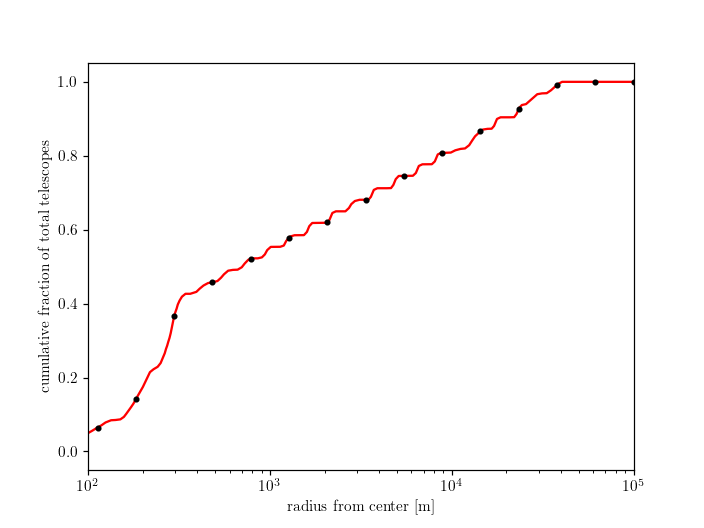

Text(0, 0.5, 'cumulative fraction of total telescopes')

In [124]:
plt.subplots()
plt.plot(x, y, 'r')
plt.plot(bins, hist, 'k.')

plt.xscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('radius from center [m]')
plt.ylabel('cumulative fraction of total telescopes')

<IPython.core.display.Javascript object>


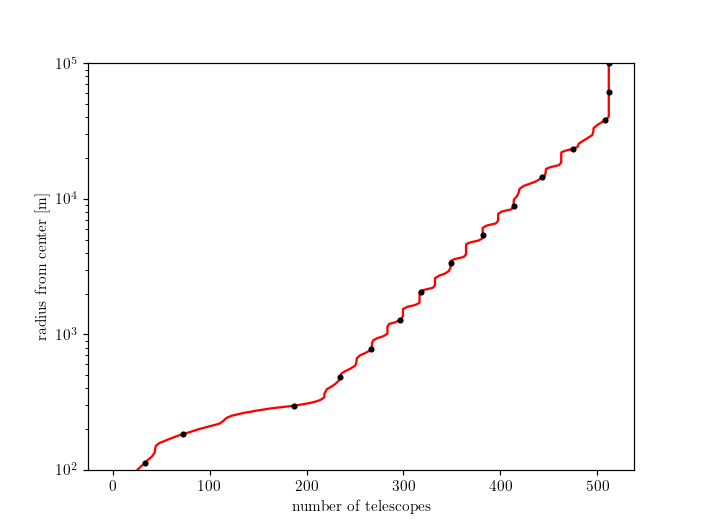

Text(0.5, 0, 'number of telescopes')

In [125]:
plt.subplots()
plt.plot(y*ct._SKALow_number_of_stations_, x, 'r')
plt.plot(hist*ct._SKALow_number_of_stations_, bins, 'k.')

plt.yscale('log')
plt.ylim(1e2, 1e5)
plt.ylabel('radius from center [m]')
plt.xlabel('number of telescopes')


In [190]:
x_arr, y_arr = sk.get_telescope_coordinate(y*ct._SKALow_number_of_stations_, x, SKA='low')

<IPython.core.display.Javascript object>


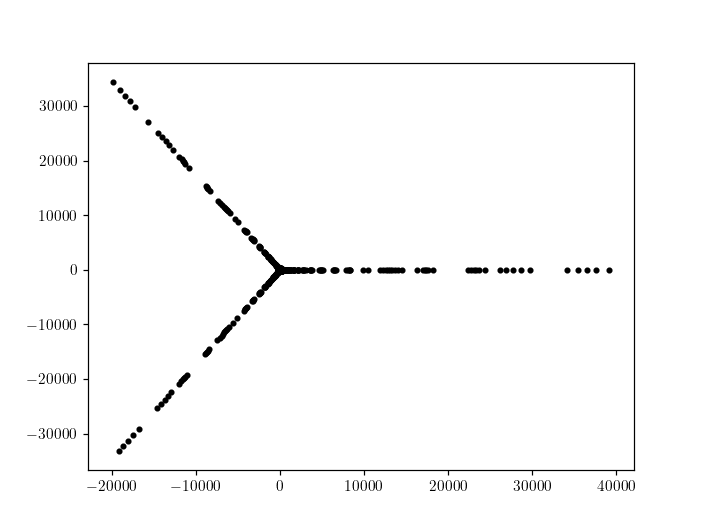

In [192]:
plt.subplots()
plt.plot(x_arr, y_arr, 'k.')

In [193]:
baseline_arr = sk.get_baseline(x_arr, y_arr)

In [199]:
hist, bin_edge = np.histogram(baseline_arr, bins=np.logspace(1, 5, 20))
hist_cumsum = np.cumsum(hist)

<IPython.core.display.Javascript object>


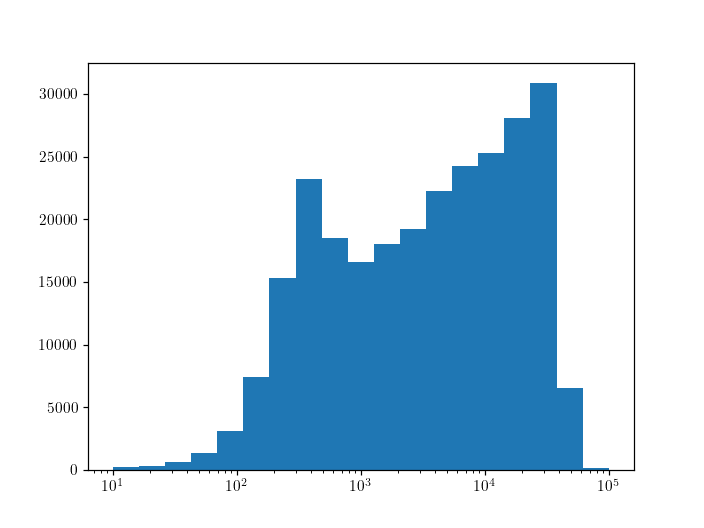

<IPython.core.display.Javascript object>


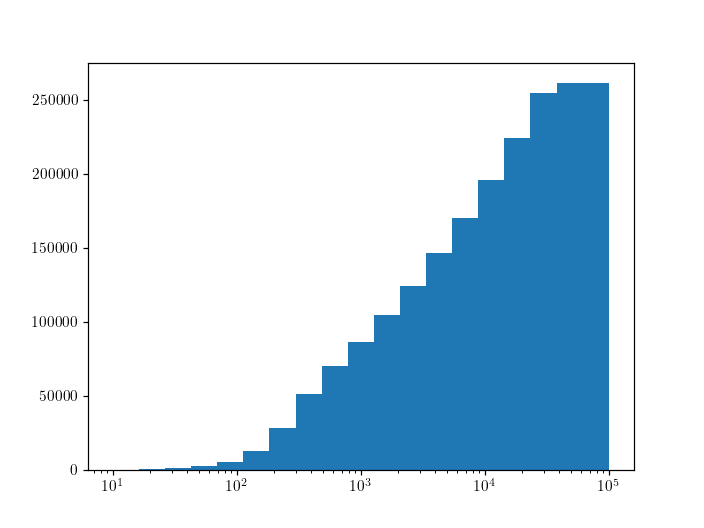

In [205]:
plt.subplots()
plt.hist(bin_edge[:-1], bins=bin_edge, weights=hist)
plt.xscale('log')

plt.subplots()
plt.hist(bin_edge[:-1], bins=bin_edge, weights=hist_cumsum)
plt.xscale('log')

Text(0,0.5,'fraction of total telescopes')

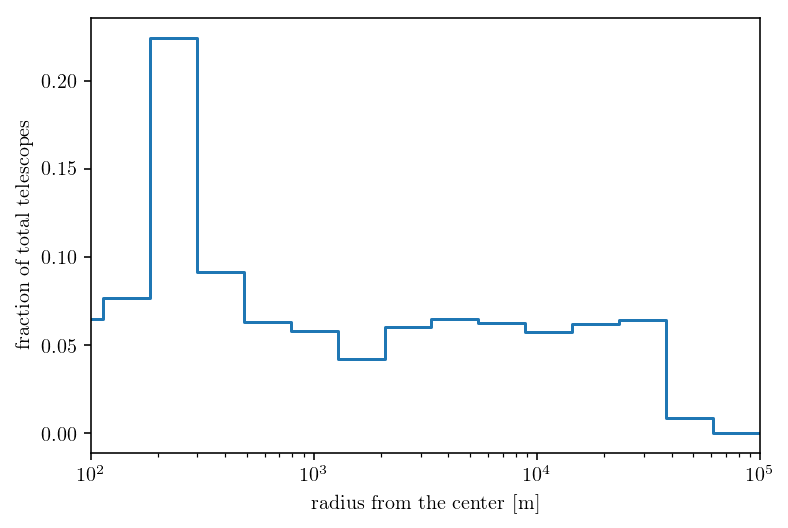

In [15]:
plt.subplots()

plt.step(dist_r_arr, dist_frac_arr, where='pre')

plt.xscale('log')
plt.xlim(1e2, 1e5)
plt.xlabel('radius from the center [m]')
plt.ylabel('fraction of total telescopes')

Text(0,0.5,'fraction of total telescopes')

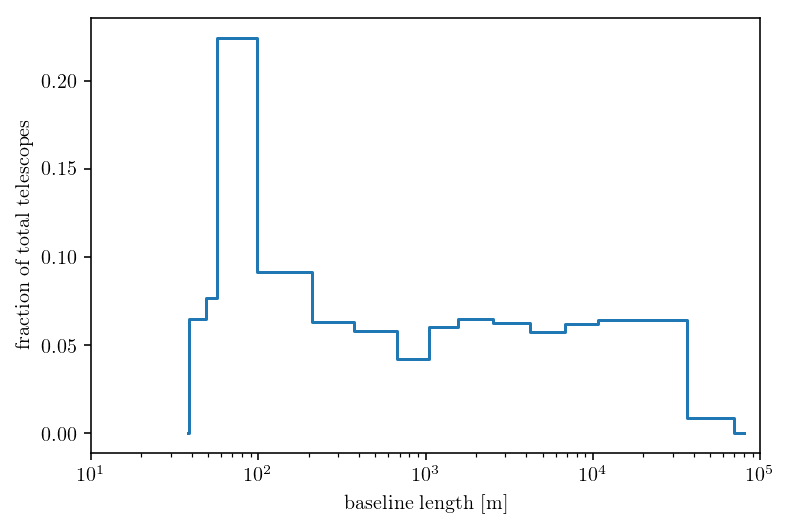

In [16]:
plt.subplots()
plt.step(baseline_arr, dist_frac_arr, where='mid')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.xlabel('baseline length [m]')
plt.ylabel('fraction of total telescopes')

Text(0,0.5,'cummulative fraction of total telescopes')

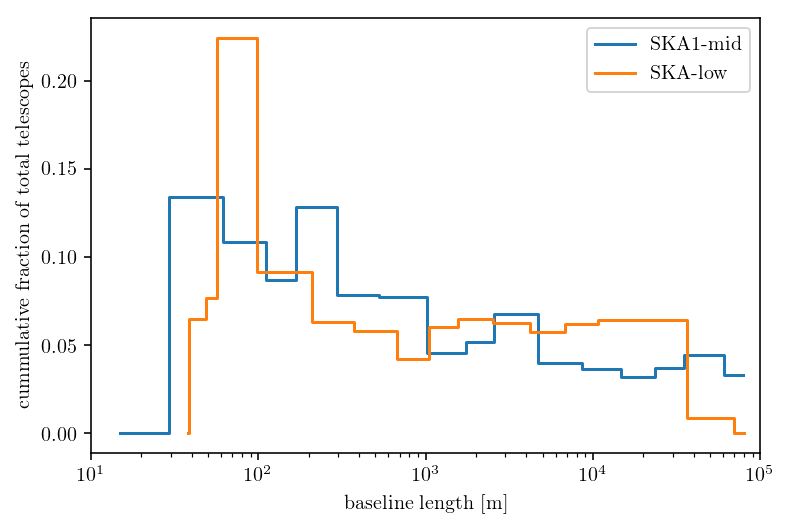

In [17]:
plt.subplots()
#plt.step(ct.baseline_arr, np.cumsum(ct.dist_frac_arr), where='mid')
x, y = sk.SKA_conf['mid baseline distribution']
plt.step(x, y, where='mid', label='SKA1-mid')
x, y = sk.SKA_conf['low baseline distribution']
plt.step(x, y, where='mid', label='SKA-low')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc='best')
plt.xlabel('baseline length [m]')
plt.ylabel('cummulative fraction of total telescopes')

Text(0,0.5,'cummulative fraction of total telescopes')

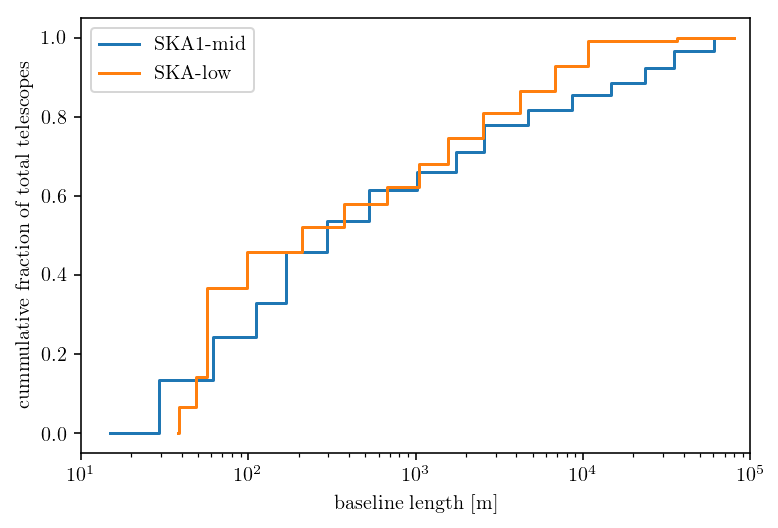

In [18]:
plt.subplots()
#plt.step(ct.baseline_arr, np.cumsum(ct.dist_frac_arr), where='mid')
x, y = sk.SKA_conf['mid baseline cumulative']
plt.step(x, y, where='mid', label='SKA1-mid')
x, y = sk.SKA_conf['low baseline cumulative']
plt.step(x, y, where='mid', label='SKA-low')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc='best')
plt.xlabel('baseline length [m]')
plt.ylabel('cummulative fraction of total telescopes')
#plt.savefig('../plots/SKA_configuration.pdf')

(10.0, 1000000.0)

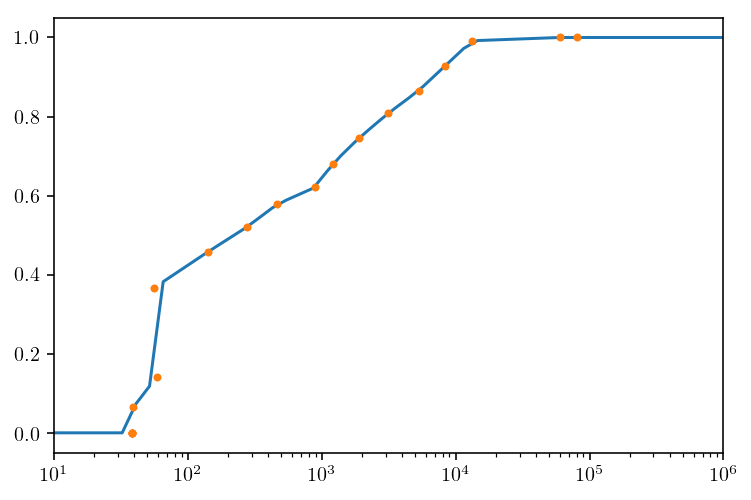

In [19]:
# test the astro.SKA_get_active_baseline()
baseline_arr, cumu_frac_arr = sk.SKA_conf['low baseline cumulative']
r = np.logspace(1, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA low')

plt.subplots()
plt.plot(r, active_baseline_arr)
plt.plot(baseline_arr, cumu_frac_arr, '.')
plt.xscale('log')
plt.xlim(1e1, 1e6)

(1.0, 1000000.0)

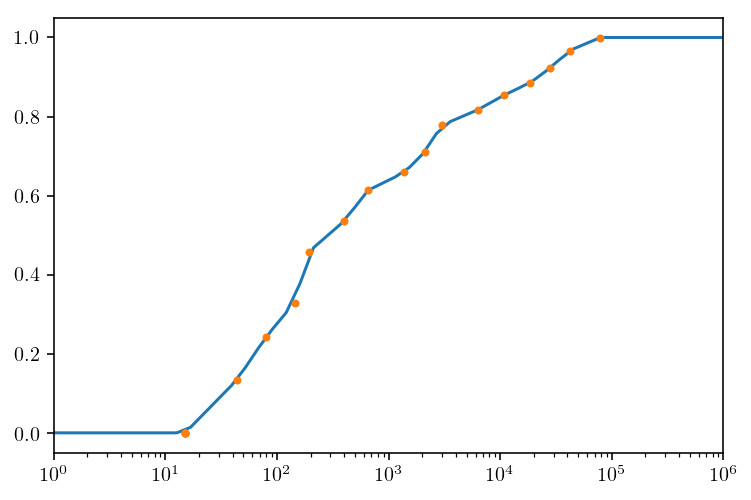

In [20]:
# test the astro.SKA_get_active_baseline()
baseline_arr, cumu_frac_arr = sk.SKA_conf['mid baseline cumulative']
r = np.logspace(0, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA mid')

plt.subplots()
plt.plot(r, active_baseline_arr)
plt.plot(baseline_arr, cumu_frac_arr, '.')
plt.xscale('log')
plt.xlim(1e0, 1e6)

In [21]:
sk.SKA_specs(0.05, exper_mode="SKA low", correlation_mode="interferometry", theta_sig=50)

(0.0, 1.0, 40.0, 0.05527436324391732, 0.0, 1e-100)

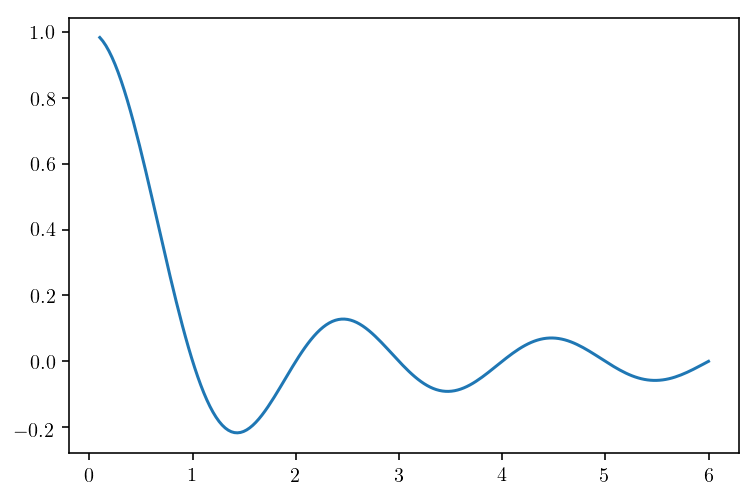

In [22]:
x_arr = np.linspace(0.1, 6, 200)
fn = lambda x: np.sin(np.pi*x)/(np.pi*x)
fn3 = lambda x: np.sin(np.pi*x)
fn2 = lambda x: fn(x) - 0.3
plt.subplots()
plt.plot(x_arr, fn(x_arr))
#plt.plot(x_arr, fn3(x_arr))

In [23]:
from scipy.optimize import root_scalar
root_scalar(fn2, bracket=[0.1,1], method="bisect")

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.7500785142090535